In [149]:
#11.1


from google.colab import drive
import os
import numpy as np
import pandas as pd
import math

drive.mount('/content/drive/')

os.chdir('/content/drive/My Drive/Colab Notebooks/Computational Methods/week11')

#Loading the data

df= pd.read_csv("LIFE-StarCatalog.csv",skiprows=[0,1,3])

print(df)


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
      RightAscension  Declination  Parallax   Distance             Name  \
0         150.252737    31.923671   66.9958  14.926309        *  20 LMi   
1         150.209236    31.929235   68.8826  14.517454      *  20 LMi B   
2         157.656585    55.980538   77.4346  12.914124        *  36 UMa   
3         157.605454    55.999127   77.4032  12.919363      *  36 UMa B   
4         316.724748    38.749416  285.9459   3.497165      *  61 Cyg A   
...              ...          ...       ...        ...              ...   
1727      217.754835   -12.296097   92.0697  10.861337        Wolf 1478   
1728      207.202527     4.100646   61.1599  16.350583        Wolf 1494   
1729       73.023885     6.476553   80.9036  12.360389        Wolf 1539   
1730      332.986937    -7.715872   78.6000  12.722646        Wolf 1555   
1731       47.814488     1.108577   59.2031 

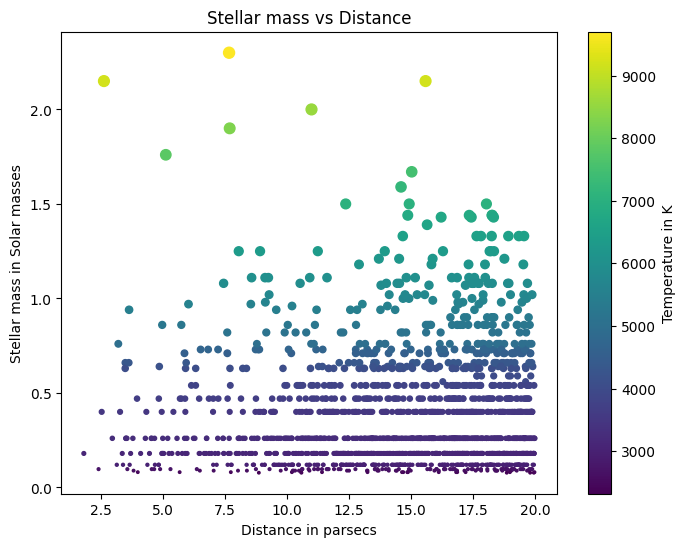

In [150]:
#11.2  Scatter plot of masses and distances
import matplotlib.pyplot as plt

# Defining the parameters

mass =  df["M"] # mass of the star
distance = df["Distance"]# distance from the sun
c=df["Teff"] # colour depends on temperature of the star
s= df["R"]*30 #size depends on the radius of the star

#Plotting the scatter plot

plt.figure(figsize=(8,6))
plt.title("Stellar mass vs Distance")
plt.scatter(distance,mass,c=c,s=s,cmap="viridis")
plt.colorbar(label="Temperature in K")
plt.xlabel("Distance in parsecs")
plt.ylabel("Stellar mass in Solar masses")
plt.show()

Most stars are low-mass and concentrated at the bottom of the y-axis,indicating there are so many small stars in our neighbourhood. More massive stars are hotter and as the radius increases, mass is increasing as well shown by the bigger markers as we move up the Y axis


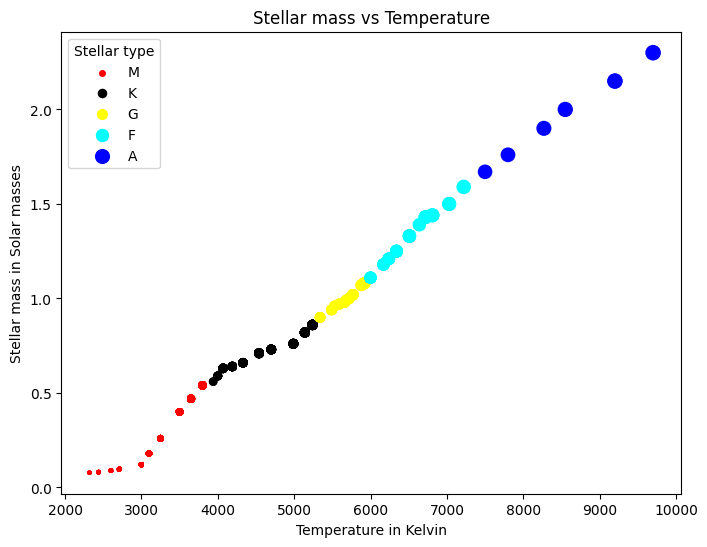

In [151]:
#11.3

# Defining the parameters

colour_type = {"M":"red","K" :"black", "G": "yellow", "F": "cyan","A":"blue"}



#Plotting the scatter plot
plt.figure(figsize=(8,6))

# Iterating over all start types

for stype,colour in colour_type.items():
  filter = df["Stype"].str.startswith(stype)
  filtered = df[filter]

  #plotting the scatter plot

  plt.scatter(filtered["Teff"],filtered["M"],c=colour,s=filtered["R"]*50,label=stype)



plt.title("Stellar mass vs Temperature")
plt.xlabel("Temperature in Kelvin")
plt.ylabel("Stellar mass in Solar masses")
plt.legend(title="Stellar type")
plt.show()

From the figure we can observe that the M stars are the coolest showing an increase in temperature going forward through K,G,F and A is the hottest.
Also the massive stars are larger in size as well.Also there appears to be more cooler stars than hotter ones.

<Figure size 800x600 with 0 Axes>

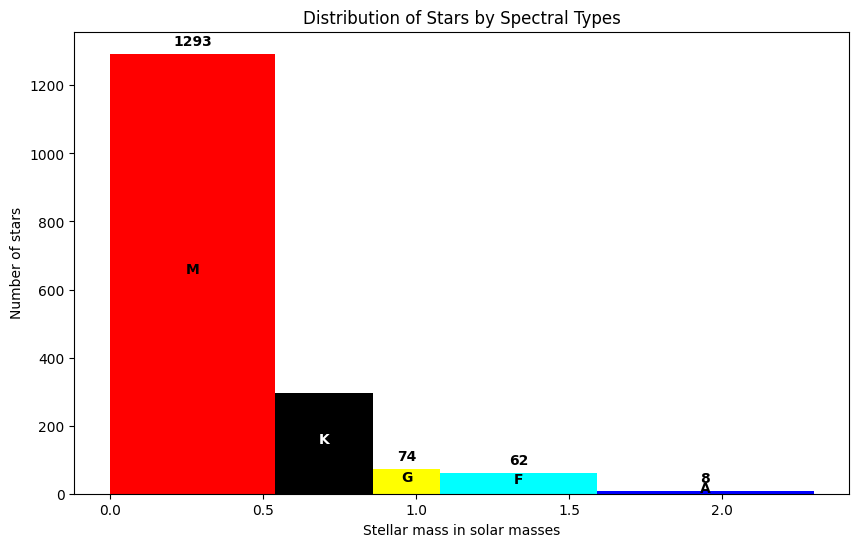

In [152]:
#11.4


# Defining the parameters

colour_type = {"M":"red","K" :"black", "G": "yellow", "F": "cyan","A":"blue"}



#Plotting the scatter plot
plt.figure(figsize=(8,6))


bin_edges = [0]

# Iterating over all star types

for stype in colour_type.keys():

    max_mass = df[df['Stype'].str.startswith(stype)]["M"].max()
    bin_edges.append(max_mass)

# Preparing histogram

plt.figure(figsize=(10, 6))
N, bins, patches = plt.hist(df["M"], bins=bin_edges)

#Using tuple unpacking and for loop  to match the colours

for i, (stype, colour) in enumerate(colour_type.items()):
    patches[i].set_facecolor(colour)

    bin_centre = (bins[i] + bins[i+1]) / 2

    # Addijng spectral type and colours
    plt.text(bin_centre, N[i]/2, stype,ha='center', weight="bold", color='white' if colour == 'black' else 'black')

    # Adding the count of stars
    plt.text(bin_centre, N[i]+25, str(int(N[i])),ha='center',weight="bold",color='white' if colour == 'black' else 'black')


plt.xlabel("Stellar mass in solar masses")
plt.ylabel("Number of stars")
plt.title("Distribution of Stars by Spectral Types")
plt.show()

Just like we saw in the previous two images, both those plots were crowded with small markers at the bottom which explains the large number of M type stars in this histogram.As the mass increases on the x axis, the massses decline drastically.

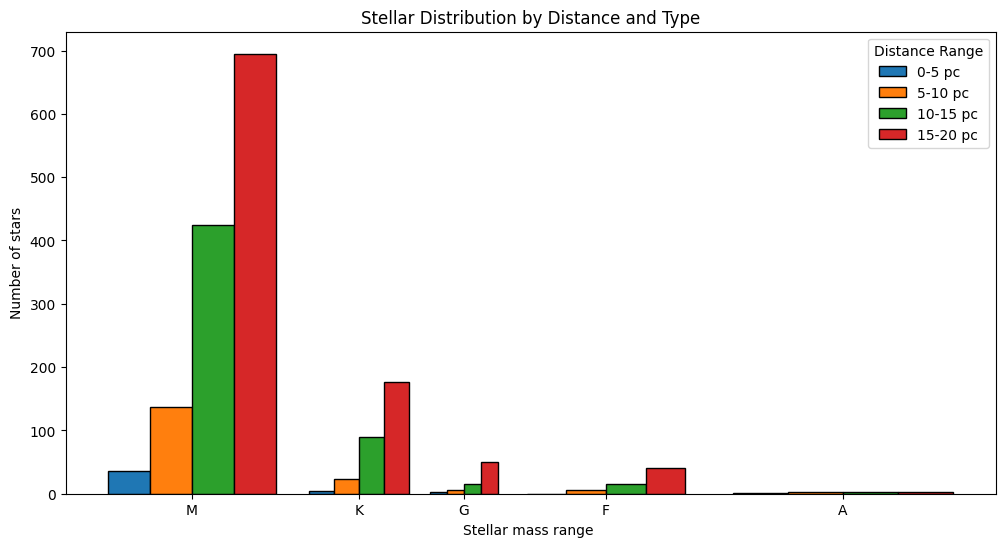

In [153]:
#11.5


import matplotlib.pyplot as plt

# First lets make 4 index lists as empty lists (as per instructions)
ind1 = [] # for 0-5 pc
ind2 = [] # for 5-10 pc
ind3 = [] # for 10-15 pc
ind4 = [] # for 15-20 pc

# Using for-loop to go through Distance column

for i in range(len(df)):
    dist = df['Distance'].iloc[i]

    if 0 <= dist < 5:
        ind1.append(i)
    elif 5 <= dist < 10:
        ind2.append(i)
    elif 10 <= dist < 15:
        ind3.append(i)
    elif 15 <= dist <= 20:
        ind4.append(i)

# Finding mass at each indices of the respective distances
masses_dist1 = df["M"].iloc[ind1]
masses_dist2 = df["M"].iloc[ind2]
masses_dist3 = df["M"].iloc[ind3]
masses_dist4 = df["M"].iloc[ind4]

# Using bin_edges from 11.4
plt.figure(figsize=(12, 6))
plt.hist([masses_dist1, masses_dist2, masses_dist3, masses_dist4],
         bins=bin_edges,
         label=["0-5 pc", "5-10 pc", "10-15 pc", "15-20 pc"],
         edgecolor='black')

# 4. Adapting the x-axis ticks to show stellar types
# Using list appending again

bin_centers = []

for i in range(len(bin_edges) - 1):
    midpoint = (bin_edges[i] + bin_edges[i+1]) / 2

    bin_centers.append(midpoint)

plt.xticks(bin_centers, ["M", "K", "G", "F", "A"])
plt.xlabel("Stellar mass range ")
plt.ylabel("Number of stars")
plt.title("Stellar Distribution by Distance and Type")
plt.legend(title="Distance Range")


plt.show()